## 1. 스킬트리
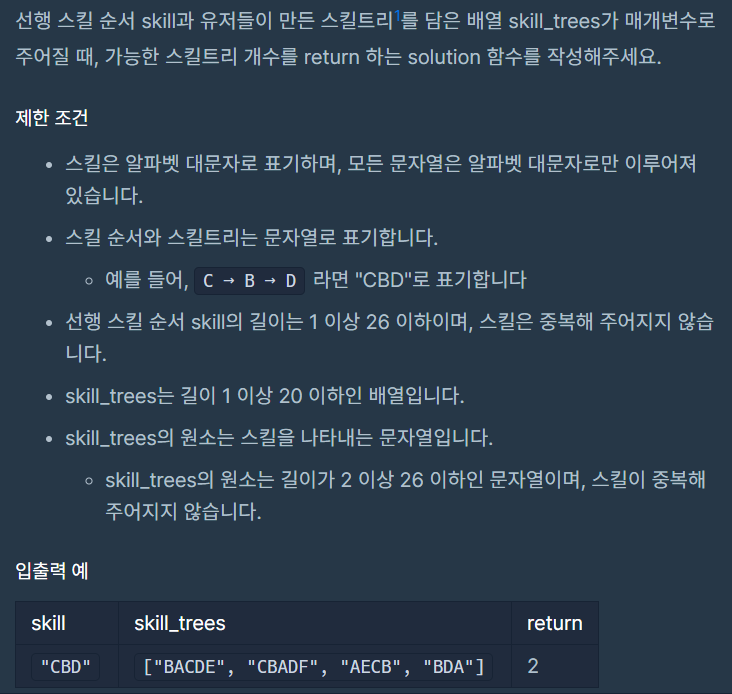

### 내 풀이
- 정규표현식으로 상관없는 스킬 제거
- 인덱스 값 검사

In [ ]:
import re

def solution(skill, skill_trees):
    result = 0
    for x in skill_trees:
        # 의미없는 스킬 제거
        x = re.sub('[^' + skill + ']', '', x)
        flag = True
        for i in range(len(x)):
            if i == skill.index(x[i]):
                continue
            else:
                flag = False
                break
        if flag:
            result += 1
    return result

### 상위 코드
- list에서 앞의 원소를 pop()하면서 검사

In [ ]:
def solution(skill, skill_trees):
    answer = 0

    for skills in skill_trees:
        skill_list = list(skill)

        for s in skills:
            if s in skill:
                if s != skill_list.pop(0):
                    break
        else:
            answer += 1

    return answer


## 2. 프린터
1. 인쇄 대기목록의 가장 앞에 있는 문서(J)를 대기목록에서 꺼냅니다.
2. 나머지 인쇄 대기목록에서 J보다 중요도가 높은 문서가 한 개라도 존재하면 J를 대기목록의 가장 마지막에 넣습니다.
3. 그렇지 않으면 J를 인쇄합니다.
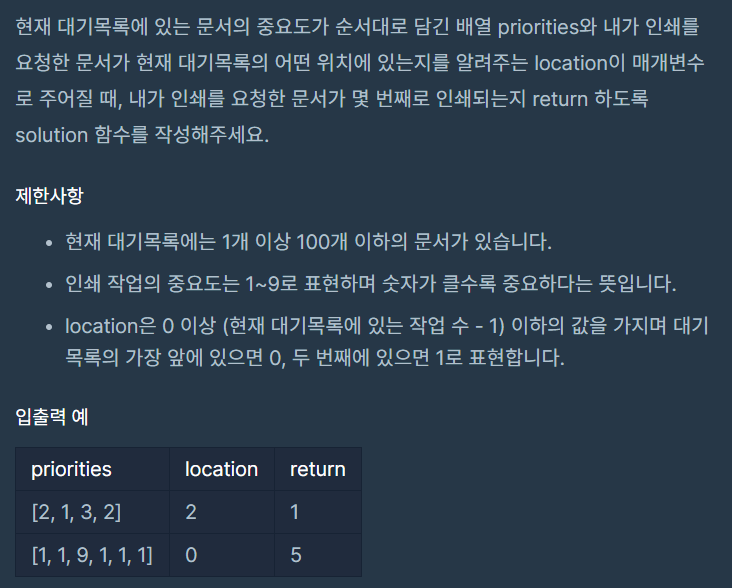

### 내 풀이
- deque 사용

In [17]:
from collections import deque

def solution(priorities, location):
    # (문서 번호, 중요도)로 큐에 삽입
    priorities = deque([(i, j) for i, j in enumerate(priorities)])
    result = []

    while True:
        num, importance = priorities.popleft()
        if len(priorities) == 0:
            result.append(num)
            break
        # 중요도가 더 큰 문서가 있는 경우
        if importance < max([j for i, j in priorities]):
            priorities.append((num, importance))
        # 해당 문서를 인쇄할 순서인 경우
        else:
            result.append(num)
            
    return result.index(location) + 1

### 상위 코드
- any()
- 답을 찾았을 경우 바로 리턴

In [ ]:
def solution(priorities, location):
    queue =  [(i,p) for i,p in enumerate(priorities)]
    answer = 0
    while True:
        cur = queue.pop(0)
        if any(cur[1] < q[1] for q in queue):
            queue.append(cur)
        else:
            answer += 1
            if cur[0] == location:
                return answer

## 3. 숫자의 표현
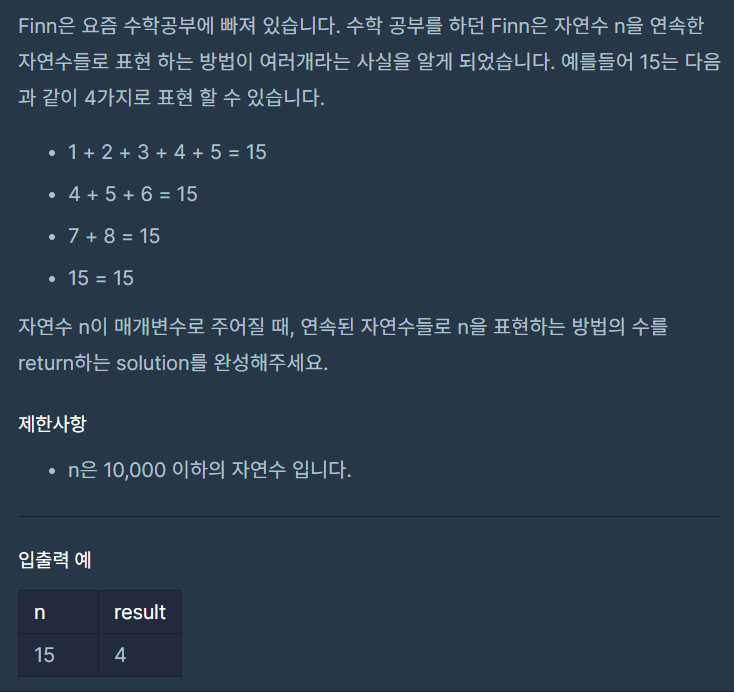

### 내 풀이
- n이 짝수이건 홀수이건 홀수를 약수로 가지는 경우의 수 + 1씩 해주면 된다

In [19]:
def solution(n):        
    # 1과 자기 자신을 제외한 약수 구하기
    arr = [i for i in range(2, n // 2 + 1) if n % i == 0]
    
    answer = 0
    # n이 짝수
    if n % 2 == 0:
        # 자기 자신
        answer = 1
        for x in arr:
            if x % 2 != 0:
                answer += 1
            
    # n이 홀수
    else:
        answer = 2 
        answer += len(arr)
        
    return answer 

### 상위 코드

In [21]:
def expressions(num):
    return len([i for i in range(1, num + 1, 2) if num % i == 0])

## 4. 오픈채팅방

In [24]:
def solution(record):
    answer = []
    # 유저 아이디 : 닉네임
    id_dict = {}
    result = []
    for s in record:
        message = s.split(' ')
        answer.append(message)
        if message[0] == 'Enter' or message[0] == 'Change':
            id_dict[message[1]] = message[2]
    
    for a in answer:
        if len(a) == 3:
            if a[0] == 'Enter':
                result.append(id_dict[a[1]]+'님이 들어왔습니다.')
        else:
            result.append(id_dict[a[1]]+'님이 나갔습니다.')
            
    return result

In [25]:
solution(["Enter uid1234 Muzi", "Enter uid4567 Prodo","Leave uid1234","Enter uid1234 Prodo","Change uid4567 Ryan"])

[['Enter', 'uid1234', 'Muzi'], ['Enter', 'uid4567', 'Prodo'], ['Leave', 'uid1234'], ['Enter', 'uid1234', 'Prodo'], ['Change', 'uid4567', 'Ryan']]


['Prodo님이 들어왔습니다.', 'Ryan님이 들어왔습니다.', 'Prodo님이 나갔습니다.', 'Prodo님이 들어왔습니다.']